# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [12]:
players = pd.read_csv("players.csv")
matches = pd.read_csv("matches.csv")
winners = pd.read_csv("winners.csv")

Data Cleaning

In [5]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [19]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [20]:
matches['MatchID'].value_counts()

300186501.0    2
300186490.0    2
300186508.0    2
300186474.0    2
300186504.0    2
              ..
395.0          1
1990.0         1
265.0          1
300061500.0    1
1096.0         1
Name: MatchID, Length: 836, dtype: int64

In [21]:
matches.dropna(how='all',inplace=True)
matches['Datetime'] = pd.to_datetime(matches['Datetime'])
matches = matches.drop_duplicates(subset='MatchID')
#matches.set_index('Year', inplace=True)

In [22]:
matches.dropna(subset=['Year'], inplace=True)

In [23]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [24]:
matches['Home Team Name'].value_counts()

Brazil                     78
Italy                      57
Argentina                  52
Germany FR                 43
England                    35
                           ..
Serbia                      1
Wales                       1
New Zealand                 1
rn">Trinidad and Tobago     1
Iran                        1
Name: Home Team Name, Length: 78, dtype: int64

In [25]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
Name: Home Team Name, dtype: int64

In [27]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago']

In [28]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina',
 'United Arab Emirates',
 'Trinidad and Tobago']

In [29]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

In [30]:
wrong = wrong + old_name
correct = correct + new_name

In [32]:
for index, wr in enumerate(wrong):
    winners = winners.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

Most Number of World Cup Winning Title

In [41]:
champion = winners['Winner'].value_counts()
champion

Brazil       5
Germany      4
Italy        4
Uruguay      2
Argentina    2
Spain        1
France       1
England      1
Name: Winner, dtype: int64

In [37]:
runnerup = winners['Runners-Up'].value_counts()
runnerup

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Italy             2
Brazil            2
Hungary           2
France            1
Sweden            1
Name: Runners-Up, dtype: int64

In [38]:
third = winners['Third'].value_counts()
third

Germany        4
Poland         2
Sweden         2
France         2
Brazil         2
Austria        1
Italy          1
Croatia        1
Netherlands    1
Turkey         1
USA            1
Chile          1
Portugal       1
Name: Third, dtype: int64

In [48]:
teams = pd.concat([champion, runnerup, third], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Uruguay,2,0,0
Argentina,2,3,0
Spain,1,0,0
France,1,1,2
England,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


Text(0.5, 1.0, 'Number of podium by country')

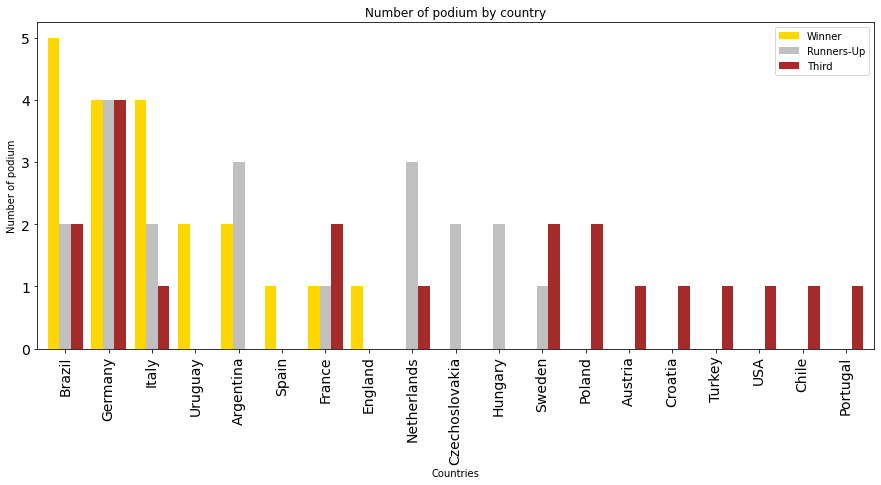

In [52]:
teams.plot(y=['Winner', 'Runners-Up', 'Third'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')

Number of goal per match per country and per cup

In [53]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [74]:
home_goal = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home_match = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].count()

In [71]:
away_goal = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away_match = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].count()

In [70]:
goals = pd.concat([home_goal, away_goal], axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
1930.0 Argentina     18.0
       Belgium        0.0
       Bolivia        0.0
       Brazil         5.0
       Chile          5.0
...                   ...
2014.0 Russia         2.0
       Spain          4.0
       Switzerland    7.0
       USA            5.0
       Uruguay        4.0

[427 rows x 1 columns]

In [77]:
matchs = pd.concat([home_match, away_match], axis=1)
matchs.fillna(0, inplace=True)
matchs['Matchs'] = matchs['Home Team Goals'] + matchs['Away Team Goals']
matchs = matchs.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
matchs

Matchs
1930.0 Argentina       5.0
       Belgium         2.0
       Bolivia         2.0
       Brazil          2.0
       Chile           3.0
...                    ...
2014.0 Russia          3.0
       Spain           3.0
       Switzerland     4.0
       USA             4.0
       Uruguay         4.0

[427 rows x 1 columns]

In [120]:
goal_per_match = pd.concat([goals, matchs], axis=1)
goal_per_match = goal_per_match.reset_index()
goal_per_match.columns = ['Year', 'Country', 'Goals', 'Matchs']
goal_per_match

,Year,Country,Goals,Matchs
0,1930.0,Argentina,18.0,5.0
1,1930.0,Belgium,0.0,2.0
2,1930.0,Bolivia,0.0,2.0
3,1930.0,Brazil,5.0,2.0
4,1930.0,Chile,5.0,3.0
...,...,...,...,...
422,2014.0,Russia,2.0,3.0
423,2014.0,Spain,4.0,3.0
424,2014.0,Switzerland,7.0,4.0
425,2014.0,USA,5.0,4.0


In [126]:
goal_per_match_by_country = goal_per_match.groupby('Country').sum()
goal_per_match_by_country = goal_per_match_by_country.drop(labels = 'Year', axis = 1)
goal_per_match_by_country['Goal_per_match'] = goal_per_match_by_country['Goals'] / goal_per_match_by_country['Matchs']
goal_per_match_by_country = goal_per_match_by_country.sort_values(by = ['Goal_per_match', 'Goals'], ascending = [False, False])
goal_per_match_by_country

,Goals,Matchs,Goal_per_match
Country,,,
Hungary,87.0,32.0,2.718750
Brazil,221.0,104.0,2.125000
Germany,224.0,106.0,2.113208
Turkey,20.0,10.0,2.000000
France,106.0,59.0,1.796610
...,...,...,...
Canada,0.0,3.0,0.000000
China PR,0.0,3.0,0.000000
Dutch East Indies,0.0,1.0,0.000000


Text(0.5, 1.0, 'Goals per match by country')

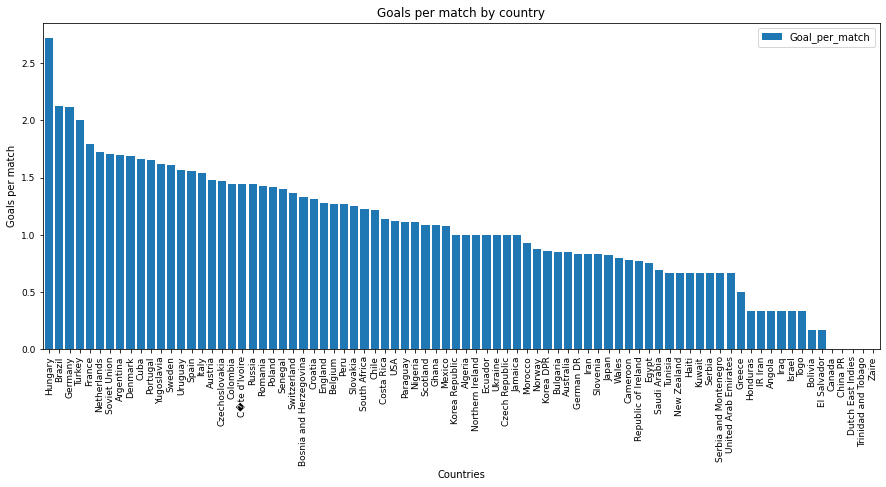

In [127]:
goal_per_match_by_country.plot(y='Goal_per_match', kind="bar", figsize=(15, 6), fontsize=9, width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Goals per match')
plt.title('Goals per match by country')

In [132]:
goal_per_match_by_cup = goal_per_match.groupby('Year').sum()
goal_per_match_by_cup['Goal_per_match'] = goal_per_match_by_cup['Goals'] / goal_per_match_by_cup['Matchs']
goal_per_match_by_cup = goal_per_match_by_cup.sort_values(by = ['Year', 'Goal_per_match'], ascending = [True, False])
goal_per_match_by_cup

,Goals,Matchs,Goal_per_match
Year,,,
1930.0,70.0,36.0,1.944444
1934.0,70.0,34.0,2.058824
1938.0,84.0,36.0,2.333333
1950.0,88.0,44.0,2.000000
1954.0,140.0,52.0,2.692308
1958.0,126.0,70.0,1.800000
1962.0,89.0,64.0,1.390625
1966.0,89.0,64.0,1.390625
1970.0,95.0,64.0,1.484375


Text(0.5, 1.0, 'Goals per match by cup')

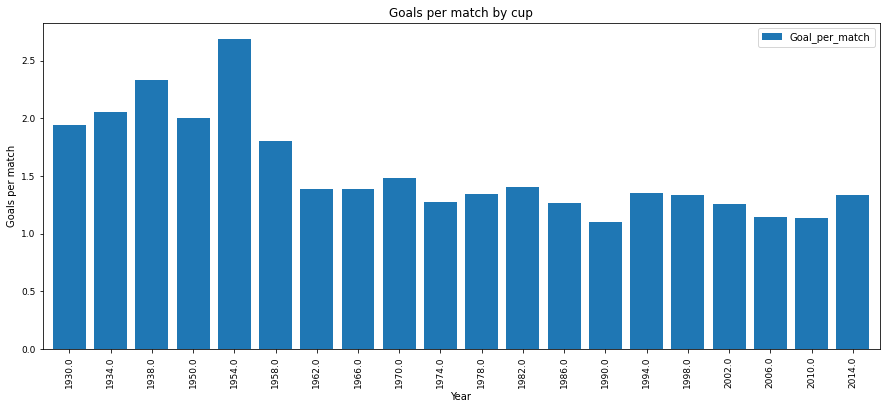

In [133]:
goal_per_match_by_cup.plot(y='Goal_per_match', kind="bar", figsize=(15, 6), fontsize=9, width=0.8, align='center')
plt.xlabel('Year')
plt.ylabel('Goals per match')
plt.title('Goals per match by cup')